In [9]:
import sys
sys.path.append('../')

%reload_ext autoreload
%autoreload 2

import Utility as ut
import pandas as pd

## Interesting things
The productivity (precentage of eggs laid) on death percentage can be divided in two/three (it depends from your choice) clusters: the first one has an high productivity and a low death rate; the second one has a medium productivity and a higher death rate; the third one has a really bad productivity and a high death rate. It is interesting that this third cluster is found just in the cycle C while the others two clusters can be appended to almost every cycle. So every cycle starts with the first cluster and ends with the second one.

## Data loading

In [3]:
cycles = []

cycleZ = pd.read_csv("../Data/Chickens data/WithMacro/CycleZ-Clean.csv")
cycleZ = cycleZ.drop(columns=["Feed","Water"])
cycles.append(cycleZ)

cycleX1 = pd.read_csv("../Data/Chickens data/WithMacro/CycleX_1-Clean.csv")
cycleX1 = cycleX1.drop(columns=["Feed","Water"])
cycles.append(cycleX1)

cycleX2 = pd.read_csv("../Data/Chickens data/WithMacro/CycleX_2-Clean.csv")
cycleX2 = cycleX2.drop(columns=["Feed","Water"])
cycles.append(cycleX2)

cycleY = pd.read_csv("../Data/Chickens data/WithMacro/CycleY-Clean.csv")
cycleY = cycleY.drop(columns=["Feed","Water"])
cycles.append(cycleY)

cycleA = pd.read_csv("../Data/Chickens data/WithMacro/CycleA-Clean.csv")
cycleA = cycleA.drop(columns=["Feed","Water"])
cycles.append(cycleA)

cycleB = pd.read_csv("../Data/Chickens data/WithMacro/CycleB-Clean.csv")
cycleB = cycleB.drop(columns=["Feed","Water"])
cycles.append(cycleB)

cycleC = pd.read_csv("../Data/Chickens data/WithMacro/CycleC-Clean.csv")
cycleC = cycleC.drop(columns=["Feed","Water"])
cycles.append(cycleC)

cycle = pd.concat(cycles, axis=0, ignore_index=True)

cycle

,Arrival Chickens Date,Death,Chickens,DeathPerc,Date of Laid,Eggs,Laied,Date of Selling,# Eggs sold (First quality),# Eggs sold (Second quality),AvgTemp,MinTemp,MaxTemp,AvgHum,MinHum,MaxHum
0,11/17/2016,6,42130,0.000142,1/8/2017,30080,0.713981,NaN,0.0,0.0,-3.9,-8.5,2.9,66.4,44.9,80.9
1,11/17/2016,9,42121,0.000214,1/9/2017,31710,0.752831,NaN,63960.0,0.0,-3.4,-7.5,2.5,66.6,46.5,80.7
2,11/17/2016,13,42108,0.000309,1/10/2017,33800,0.802698,NaN,42530.0,0.0,-1.2,-7.5,1.5,72.3,57.3,87.5
3,11/17/2016,10,42098,0.000238,1/11/2017,34330,0.815478,NaN,32220.0,0.0,-0.8,-3.9,4.0,51.7,34.6,65.8
4,11/17/2016,12,42086,0.000285,1/12/2017,34050,0.809058,NaN,32400.0,0.0,-0.2,-2.0,1.1,69.2,51.6,99.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3004,6/20/2022,20,39700,0.000504,11/23/2022,28440,0.716373,11/23/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3005,6/20/2022,19,39685,0.000479,11/24/2022,28320,0.713620,11/24/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3006,6/20/2022,24,39665,0.000605,11/25/2022,28440,0.717005,11/25/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3007,6/20/2022,23,39646,0.000580,11/26/2022,28710,0.724159,11/26/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
cycle = cycle.rename(columns={"Laied": "Laid"})

## Parameters

In [5]:
variables_to_cluster = ["Laid", "DeathPerc"]
variable_to_plot_1 = 'DeathPerc'
variavle_to_plot_2 = 'Laid'
# variavle_to_plot_4 = 'AvgTemp'
# variable_to_plot_4 = 'Laied'

## Hierarcical

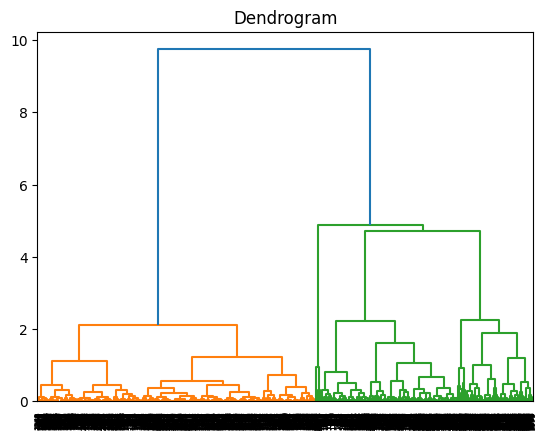

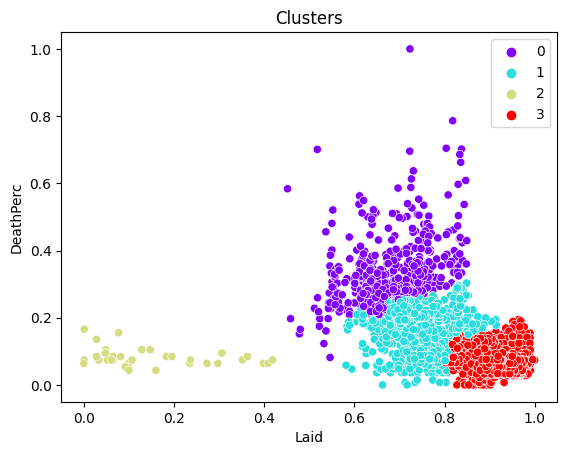

In [12]:
hirerchical_labels_2 = ut.HierarchicalClutering(cycle, variables_to_cluster)

Counter({3: 1687, 1: 831, 0: 456, 2: 35})
[0, 1, 2, 3]


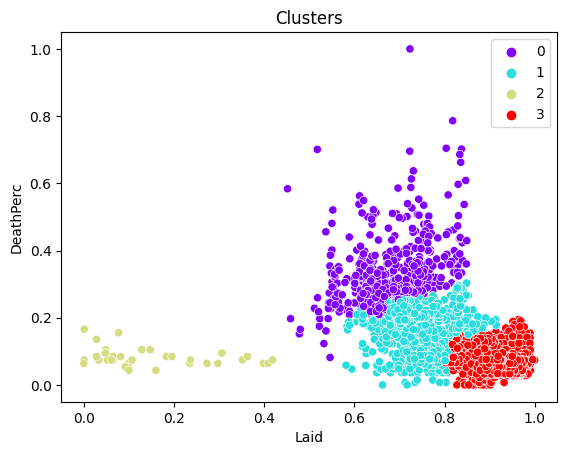

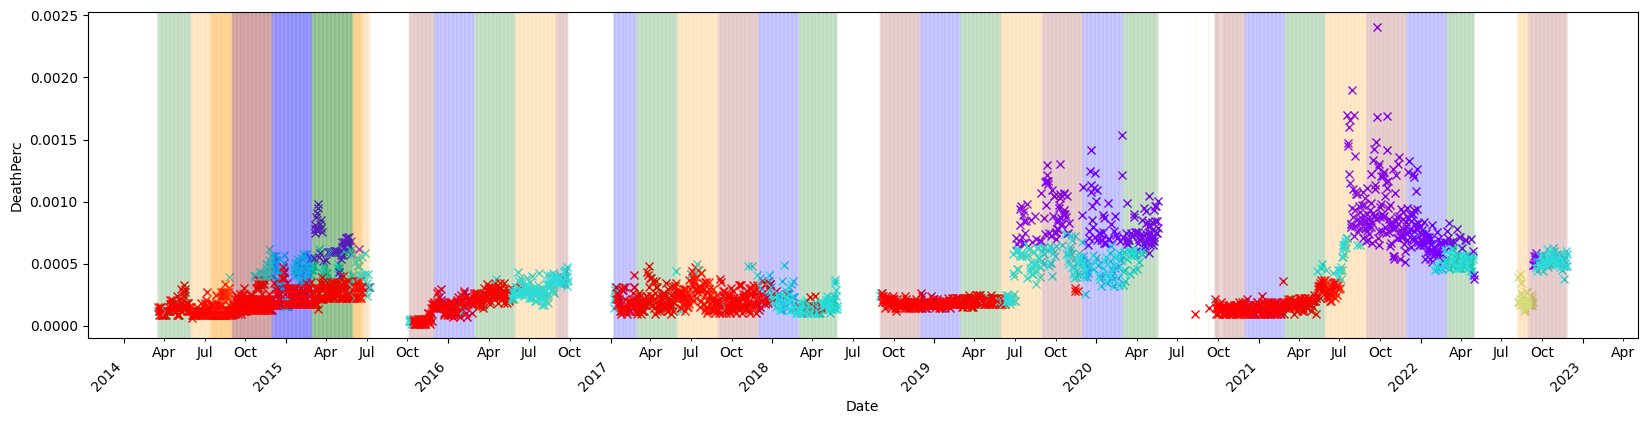

In [13]:
ut.TemporalCluster(cycle, hirerchical_labels_2, variables_to_cluster, variable_to_plot_1)

Counter({1: 1687, 0: 1322})
[0, 1]


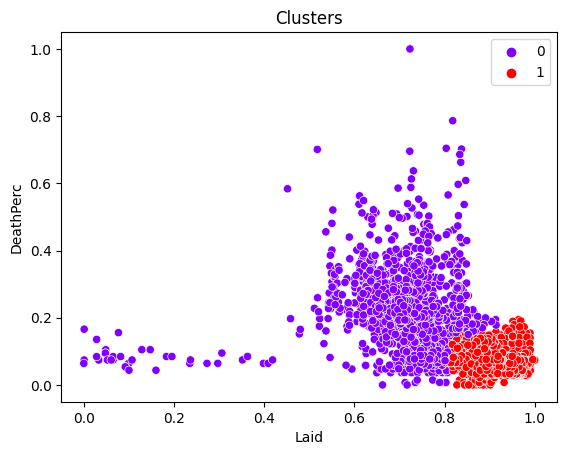

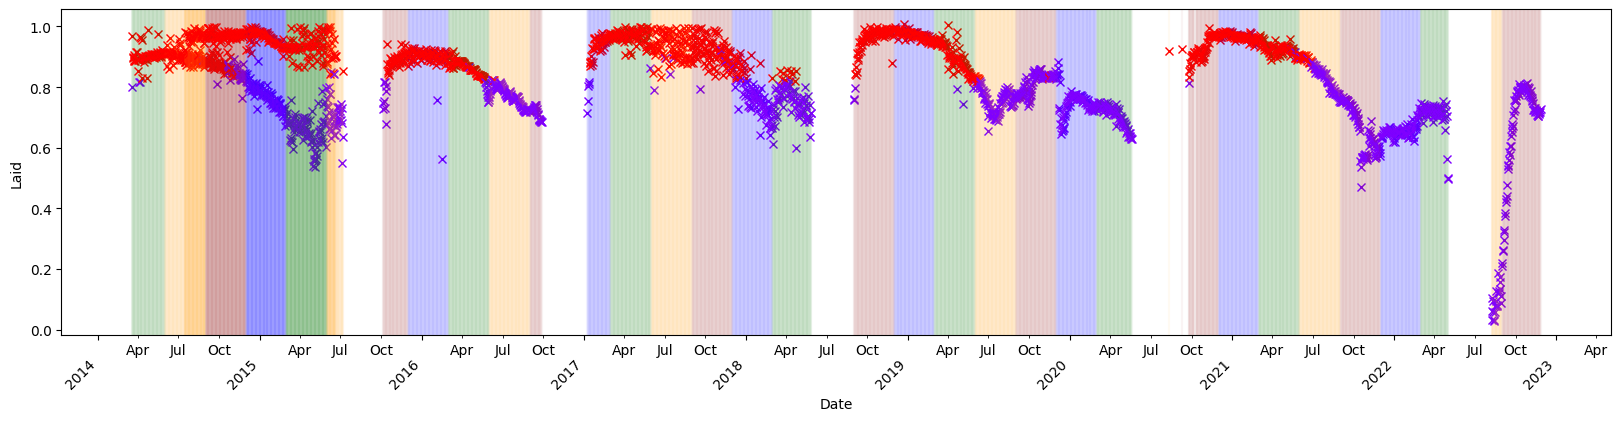

In [11]:
ut.TemporalCluster(cycle, hirerchical_labels_2, variables_to_cluster, variavle_to_plot_2)

In [30]:
# ut.TemporalCluster(cycle, hirerchical_labels_2, variables_to_cluster, variable_to_plot_4)

In [31]:
# ut.TemporalCluster(cycle, hirerchical_labels_2, variables_to_cluster, variable_to_plot_5)

## Density

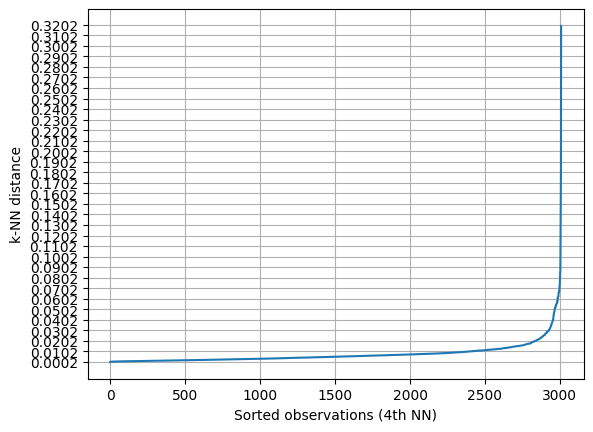

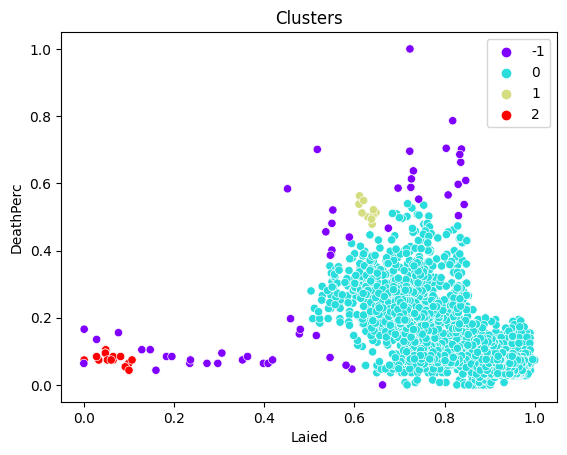

In [32]:
density_labels = ut.DensityClustering(cycle, variables_to_cluster)

Counter({0: 2929, -1: 54, 2: 16, 1: 10})
[-1, 0, 1, 2]


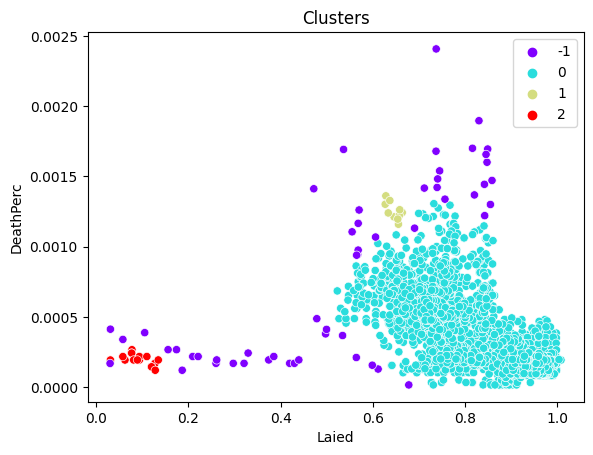

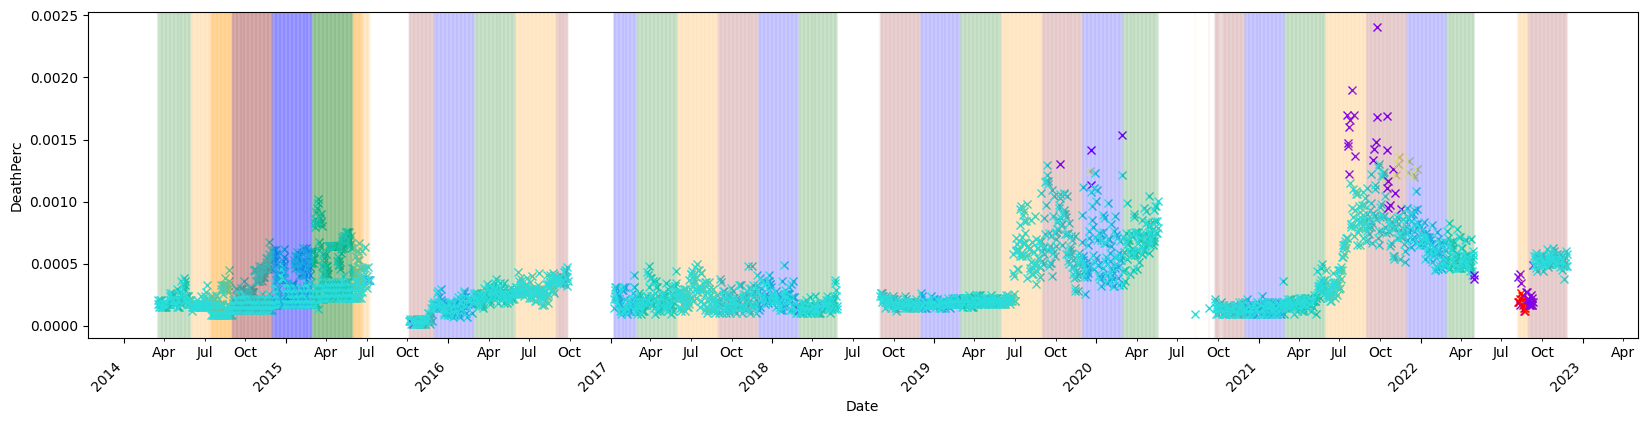

In [33]:
ut.TemporalCluster(cycle, density_labels, variables_to_cluster, variable_to_plot_1)

In [34]:
ut.TemporalCluster(cycle, density_labels, variables_to_cluster, variavle_to_plot_3)

Counter({0: 2929, -1: 54, 2: 16, 1: 10})


ValueError: invalid literal for int() with base 10: ''

In [ ]:
ut.TemporalCluster(cycle, density_labels, variables_to_cluster, variavle_to_plot_4)

In [ ]:
ut.TemporalCluster(cycle, density_labels, variables_to_cluster, variable_to_plot_5)

## K-means

In [ ]:
kMeans_labels = ut.KMeanClustering(cycle, variables_to_cluster)

In [ ]:
ut.TemporalCluster(cycle, kMeans_labels, variables_to_cluster, variable_to_plot_1)

In [ ]:
ut.TemporalCluster(cycle, kMeans_labels, variables_to_cluster, variavle_to_plot_3)

In [ ]:
ut.TemporalCluster(cycle, kMeans_labels, variables_to_cluster, variavle_to_plot_4)

In [ ]:
ut.TemporalCluster(cycle, kMeans_labels, variables_to_cluster, variable_to_plot_5)